In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
df = pd.read_csv(r'titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [36]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [12]:
x_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [14]:
age_median_train = x_train['Age'].median()
age_mean_train = x_train['Age'].mean()

In [15]:
fare_median_train = x_train['Fare'].median()
fare_mean_train = x_train['Fare'].mean()

In [16]:
x_train['Age_median'] = x_train['Age'].fillna(age_median_train)
x_train['Age_mean'] = x_train['Age'].fillna(age_mean_train)
x_train['Fare_median'] = x_train['Fare'].fillna(fare_median_train)
x_train['Fare_mean'] = x_train['Fare'].fillna(fare_mean_train)

In [30]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
575,19.0,14.5000,0,19.0,19.000000,14.5000,14.500000
415,NaN,8.0500,0,28.0,29.498846,8.0500,8.050000
449,52.0,30.5000,0,52.0,52.000000,30.5000,30.500000
202,34.0,6.4958,0,34.0,34.000000,6.4958,6.495800
434,50.0,NaN,1,50.0,50.000000,14.4000,32.517788


<Axes: ylabel='Density'>

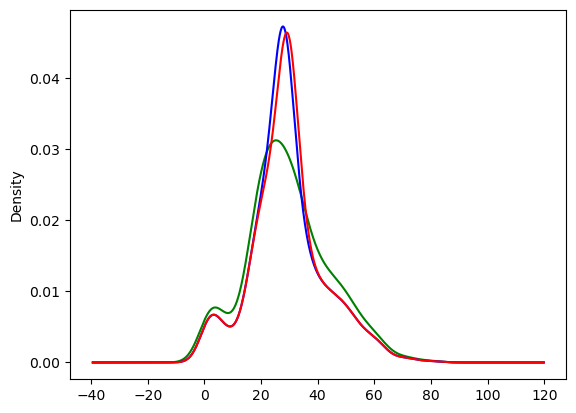

In [32]:
x_train['Age'].plot.density(color = 'green')
x_train['Age_median'].plot.density(color = 'blue')
x_train['Age_mean'].plot.density(color = 'red')

In [33]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


<Axes: >

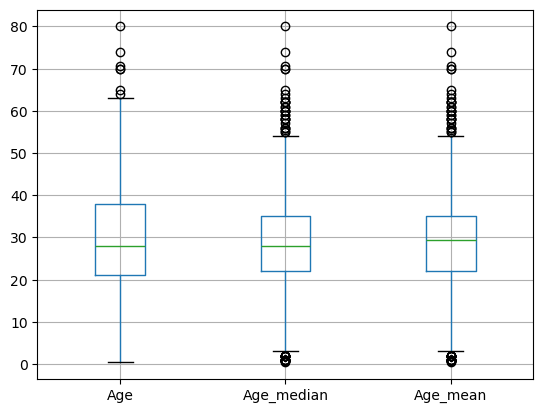

In [34]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()

Using Sklearn

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [38]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy = 'median')

In [42]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare']),
], remainder = 'passthrough')

In [43]:
trf.fit(X_train)

c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [44]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [45]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [46]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])